In [30]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

In [3]:
file_location = r"C:\Users\llubowa\Downloads\Real estate valuation data set.xlsx"
def wrangle(path):
    df = pd.read_excel(path)
    df.rename(columns={"X1 transaction date":"transaction_date",
    "X2 house age":"age",
    "X3 distance to the nearest MRT station":"distance_to_station",
    "X4 number of convenience stores":"stores",
    "X5 latitude":"lat",
    "X6 longitude":"lon",
    "Y house price of unit area":"price"},inplace=True)

    base = []
    for date in df["transaction_date"]:
        start = date
        year = int(start)
        rem = start - year
        delta = (rem * 365)-31
        base_date = datetime(year, 1, 1)
        period = (base_date + timedelta(delta)).strftime('%Y-%m')
        base.append(period)
        
    df2 = pd.DataFrame(base)
    df["Date"] = df2
    df.drop(columns="transaction_date", inplace=True)
    # Dropping Outliers
    mask_price = df["price"] < 100
    df=df[mask_price]

    return df

In [4]:
df = wrangle(file_location)

In [5]:
# Visualization on a scatter plot location
fig = px.scatter_mapbox(
    df,
    lat = "lat",
    lon = "lon",
    center = {"lat":24.97,"lon":121.54},
    width = 800,
    height = 800,
    color = "distance_to_station",
    hover_data = ["price"]
)
fig.update_layout(mapbox_style = "open-street-map")

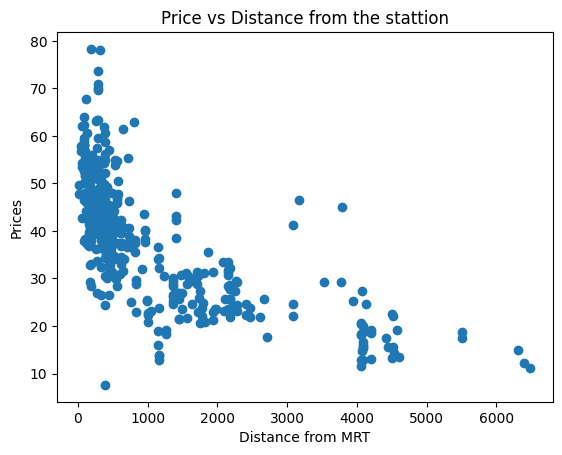

In [6]:
# Visualization Price Vs Distance from MRT
fig =px.bar(x=df["distance_to_station"], y=df["price"])
plt.scatter(x=df["distance_to_station"], y=df["price"])
plt.xlabel ("Distance from MRT")
plt.ylabel ("Prices") 
plt.title ("Price vs Distance from the stattion");

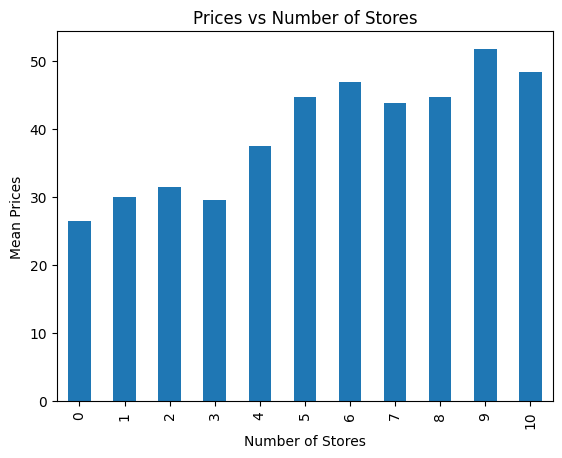

In [5]:
# Visualization Price vs Number of stores
mean_price_per_stores = df.groupby("stores")["price"].mean()
mean_price_per_stores.plot(
    kind="bar",
    xlabel="Number of Stores",
    ylabel="Mean Prices",
    title="Prices vs Number of Stores");

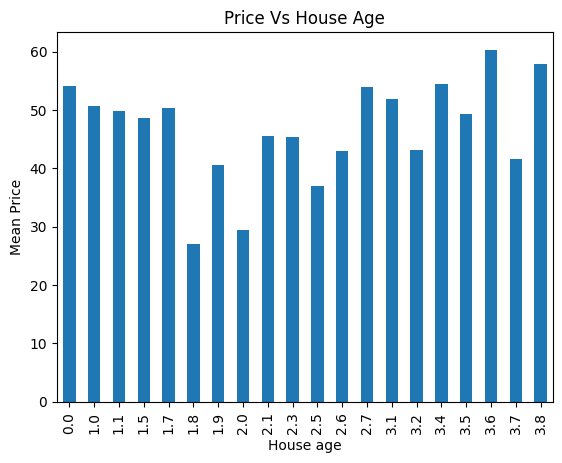

In [7]:
#Visualization Price vs building Age
mean_house_age = df.groupby("age")["price"].mean().sort_index().head(20)
mean_house_age.plot.bar(
    xlabel= "House age",
    ylabel="Mean Price",
    title="Price Vs House Age"  
);

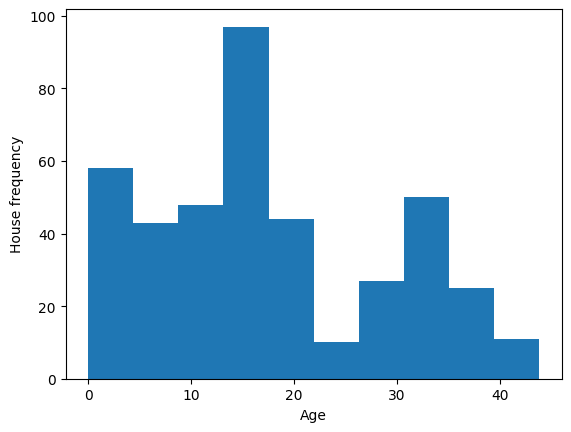

In [7]:
#print(df["age"].describe())
plt.hist(df["age"])
plt.xlabel("Age")
plt.ylabel("House frequency")
plt.show();

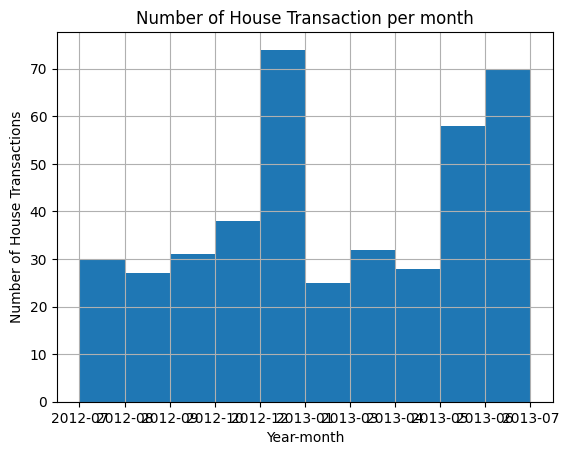

In [8]:
# Visualization on Transaction Date
df["Date"].sort_values().hist()
plt.xlabel("Year-month")
plt.ylabel("Number of House Transactions")
plt.title("Number of House Transaction per month");

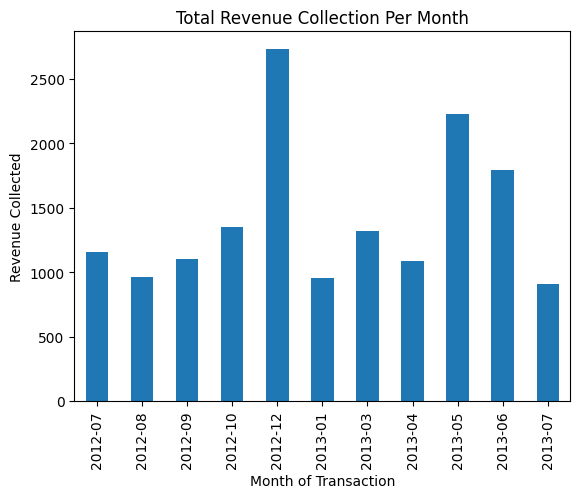

In [9]:
#Visualizing total price per month
df.groupby("Date")["price"].sum().plot(
    kind="bar",
    xlabel="Month of Transaction",
    ylabel="Revenue Collected",
    title="Total Revenue Collection Per Month");

In [9]:
#Distance from MRT Corr Price
correlation_MRT = df["distance_to_station"].corr(df["price"])
correlation_MRT 

-0.6940089730153473

In [11]:
# Number of house stores Corr Price
correlation_store = df["stores"].corr(df["price"])
correlation_store

0.6126352211777906

In [12]:
# House age Corr Price
correlation_age = df["age"].corr(df["price"])
correlation_age 

-0.2109849673356269

                          age  distance_to_station    stores
age                  1.000000             0.024676  0.048131
distance_to_station  0.024676             1.000000 -0.605328
stores               0.048131            -0.605328  1.000000


<AxesSubplot: >

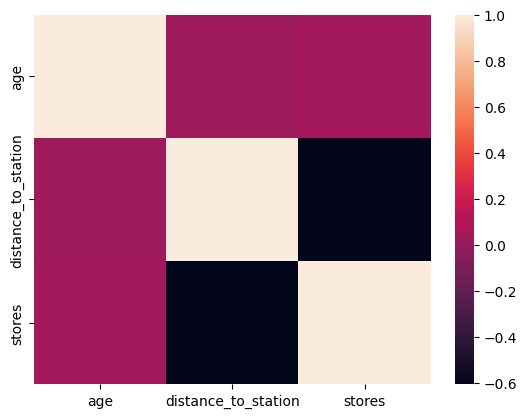

In [13]:
# Checking for multicolinearity among features
multcor = df.select_dtypes("number").drop(columns=["price","lat","lon"]).corr()
print(multcor)
sns.heatmap(multcor) 

In [10]:
# Splitting data into target and feature Matrix
target = "price"
y = df[target]
X = df.drop(columns=[target,"Date"])



In [11]:
# Splitting data into training and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.05)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(392, 5)
(21, 5)
(392,)
(21,)


In [13]:
y_mean = y_train.mean()
y_mean 

37.94311224489796

In [14]:
y_pred_baseline = [y_mean]*len(y_train)

In [15]:
len(y_pred_baseline)==len(y_train)

True

In [16]:
mae_baseline = mean_absolute_error(y_train,y_pred_baseline)
print("Mean apt price:",round(y_mean,2))
print("Baseline MAE:",round(mae_baseline,2))


Mean apt price: 37.94
Baseline MAE: 10.57


In [17]:
# Instantiating the Model
model =LinearRegression()

In [18]:
# Train Model
model.fit(X_train,y_train)

LinearRegression()

In [57]:
# EVALUATING THE MODEL

In [19]:
# Obtining the list of the model's predictions on the training data
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([33.1941031 , 39.84115005, 32.3812632 , 42.62748633, 47.68975604])

In [20]:
# Getting the training Mean absolute error
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training,4))

Training MAE: 6.0618


In [ ]:
# TESTING THE MODEL

In [21]:
# Getting predictions on the test data
y_pred_test = pd.Series(model.predict(X_test))

In [22]:
# COMMUNICATING RESULTS
# Getting the intercept
intercept = round(model.intercept_, 2)
print("Model intercept:", intercept)

Model intercept: -7315.73


In [28]:
# Getting coefficients
coefficients = model.coef_
coefficients

array([-2.56363676e-01, -3.84061874e-03,  1.25960666e+00,  2.28576180e+02,
        1.35757299e+01])

In [24]:
X_train.head()

,age,distance_to_station,stores,lat,lon
9,17.9,1783.1800,3,24.96731,121.51486
402,12.7,187.4823,1,24.97388,121.52981
376,14.7,1717.1930,2,24.96447,121.51649
371,4.1,312.8963,5,24.95591,121.53956
403,30.9,161.9420,9,24.98353,121.53966


In [29]:
# Equation of the model
print(f"House_price = {intercept} + ({coefficients[0]}*House_Age)+ ({coefficients[1]}*Distance_to_Station)+({coefficients[2]}*Stores)+({coefficients[3]}*Latitude)+({coefficients[4]}*Longitude)")

House_price = -7315.73 + (-0.25636367565295515*House_Age)+ (-0.003840618738439973*Distance_to_Station)+(1.2596066566562367*Stores)+(228.576180448394*Latitude)+(13.575729903966868*Longitude)


In [31]:
# SAVING OUR MODEL
with open("housing_price.pkl","wb") as f:
    pickle.dump(model,f) 

In [33]:
# LOAD MODEL AND SAVE IT AS EVALUATOR
with open("housing_price.pkl","rb") as f:
    Evaluator = pickle.load(f)

In [34]:
# Using the Evaluator to predict prices
y_t = Evaluator.predict(X_test)
y_t

array([40.33673885, 41.68813258, 33.32447228, 30.72614515, 51.5564343 ,
       15.62492756, 35.80803722, 38.53115993, 39.18037041, 38.83782877,
       38.98852998, 52.13774325, 28.98498398, 24.44539422, 38.45425083,
       37.809376  , 42.43467036, 46.62743457, 36.58228174, 40.72679591,
       44.74025655])

In [35]:
y_tseries =pd.Series(y_t)
y_tseries.head()

0    40.336739
1    41.688133
2    33.324472
3    30.726145
4    51.556434
dtype: float64